In [373]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [450]:
netflix_raw_df = pd.read_csv('/Users/hto/Documents/Project/netflix_titles.csv')

In [451]:
netflix_df = netflix_raw_df.copy()

In [452]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [453]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### A. Data Cleaning & Formatting

In [454]:
netflix_df.drop_duplicates(inplace= True)

In [455]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [456]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'],format='mixed')
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [457]:
netflix_df.describe().round(1)

,date_added,release_year,year_added
count,8797,8807.0,8797.0
mean,2019-05-17 05:59:08.436967168,2014.2,2018.9
min,2008-01-01 00:00:00,1925.0,2008.0
25%,2018-04-06 00:00:00,2013.0,2018.0
50%,2019-07-02 00:00:00,2017.0,2019.0
75%,2020-08-19 00:00:00,2019.0,2020.0
max,2021-09-25 00:00:00,2021.0,2021.0
std,NaN,8.8,1.6


In [458]:
print(netflix_df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [Movie, TV Show]
title           [Dick Johnson Is Dead, Blood & Water, Gangland...
director        [Kirsten Johnson, nan, Julien Leclercq, Mike F...
cast            [nan, Ama Qamata, Khosi Ngema, Gail Mabalane, ...
country         [United States, South Africa, nan, India, Unit...
date_added      [2021-09-25 00:00:00, 2021-09-24 00:00:00, 202...
release_year    [2020, 2021, 1993, 2018, 1996, 1998, 1997, 201...
rating          [PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...
duration        [90 min, 2 Seasons, 1 Season, 91 min, 125 min,...
listed_in       [Documentaries, International TV Shows, TV Dra...
description     [As her father nears the end of his life, film...
year_added      [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
dtype: object


### B. Exploratory Data Analysis (Finding included at the end of each section).

#### 1. Types of shows on Netflix

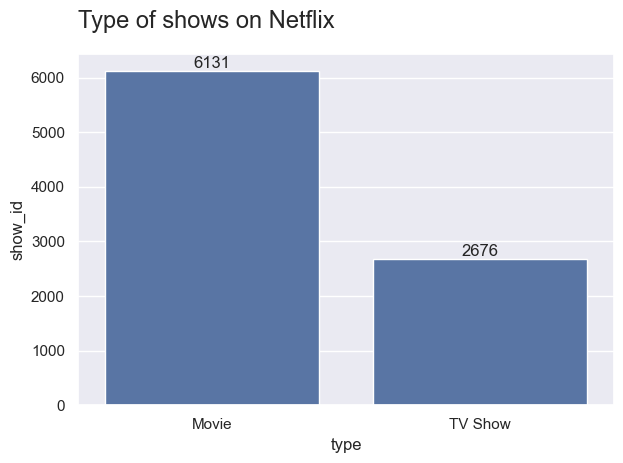

In [459]:
show_type = netflix_df[['type','show_id']].groupby(['type']).count()
show_type_graph = sns.barplot(data=show_type,
                            x='type',
                            y='show_id')
                    
show_type_graph.set_title('Type of shows on Netflix', x = 0.24, y = 1.05, fontsize = 17)
show_type_graph.bar_label(show_type_graph.containers[0])
plt.tight_layout()

**Finding:** 
1. There are 2 types of shows on Netflix, Movie and TV Show.
2. Most of shows on Netflix are Movies, with the number of Movies are more than double the number of TV Shows.

#### 2. Top country origins of movies & shows on Netflix

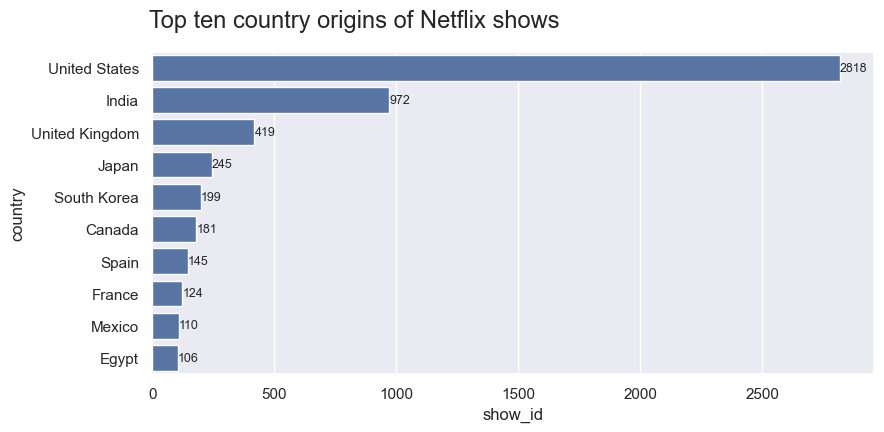

In [460]:
country_type = netflix_df[['country','show_id']].groupby(['country']).count()
country_graph = sns.barplot(data=country_type.sort_values(by=['show_id'],ascending=False).head(10),
                            x = 'show_id',
                            y = 'country',
                            orient='h')

country_graph.set_title('Top ten country origins of Netflix shows', x = 0.28, y = 1.05, fontsize = 17)
country_graph.bar_label(container = country_graph.containers[0],
                        fontsize = 9)

plt.gcf().set_size_inches(9,4.5)
plt.tight_layout()

**Finding:**
1. The top 10 country of show origins are United States, India, United Kingdom, Japan, South Korea, Canada, Spain, France, Mexico and Egypt
2. United States leads the ranking, having more than almost 3 times the number of shows from the second place - India.


#### 3. Breakdown of Movie and TV Show numbers by top country of origins

In [461]:
top10_df = (netflix_df[['country','show_id']].groupby(['country'],as_index=False).count()
    .sort_values(by=['show_id'],ascending=False)
    .head(10))
top10_country_list = top10_df['country'].to_list()

In [462]:
netflix_top10_df = netflix_df[netflix_df['country'].isin(top10_country_list)]

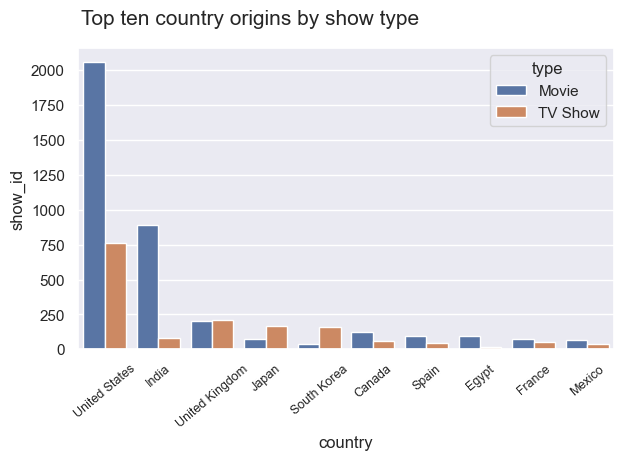

In [463]:
type_country_df = netflix_top10_df[['country','type','show_id']].groupby(['country','type']).count()

type_country_graph = sns.barplot(
    data = type_country_df.reset_index().sort_values(by=['show_id','country'],ascending=False),
    x = 'country',
    y = 'show_id',
    hue = 'type'
)

type_country_graph.set_title('Top ten country origins by show type', x = 0.32, y = 1.05, fontsize = 15)

plt.xticks(fontsize = 9, rotation=40)
plt.tight_layout()

**Finding :**
1. United States leads in both number of Movies and TV Shows on Netflix.
2. Although India ranks second place for number of Movies, United Kingdom is the second country origins for TV Shows.

#### 4. Number of shows by added year

In [464]:
netflix_df_date_fmt = netflix_df.copy()
netflix_df_date_fmt = netflix_df_date_fmt.dropna(subset=['year_added'])
netflix_df_date_fmt['year_added'] = netflix_df_date_fmt['year_added'].astype(int)

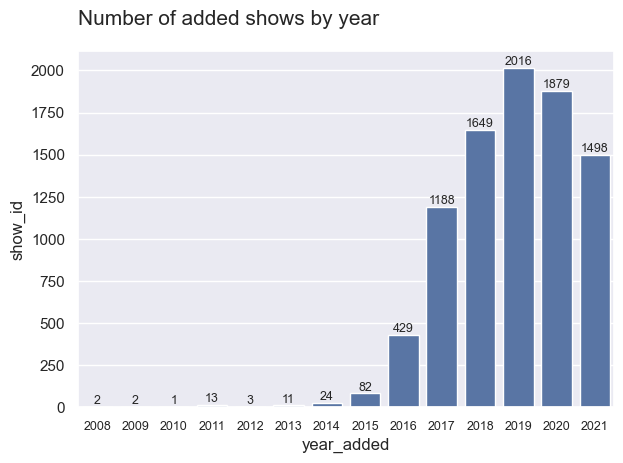

In [465]:
year_added_df = netflix_df_date_fmt[['year_added','show_id']].groupby(['year_added']).count()

year_added_graph = sns.barplot(
    data = year_added_df,
    x = 'year_added',
    y = 'show_id'
)

year_added_graph.bar_label(year_added_graph.containers[0],
                        fontsize = 9)

year_added_graph.set_title('Number of added shows by year', x = 0.28, y = 1.05, fontsize = 15)

plt.xticks(fontsize = 9, rotation=0)
plt.tight_layout()

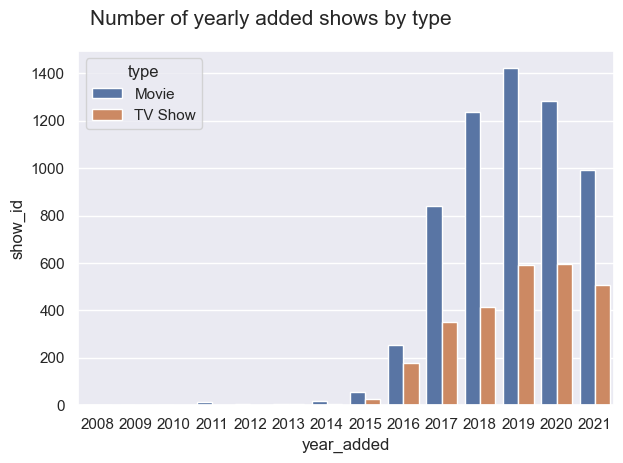

In [466]:
type_year_added_df = netflix_df_date_fmt[['type','year_added','show_id']].groupby(['year_added','type']).count()

type_year_added_graph = sns.barplot(
    data = type_year_added_df.reset_index(),
    x = 'year_added',
    y = 'show_id',
    hue = 'type'
)

type_year_added_graph.set_title('Number of yearly added shows by type', x = 0.36, y = 1.05, fontsize = 15)
plt.tight_layout()

Finding:

1. Both Movie and TV show experienced a sharp increasing trend of added shows between 2014 - 2019,
<br>
and then a declining trend between 2019 - 2021

### 5. Movie rating distribution on Netflix

In [467]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

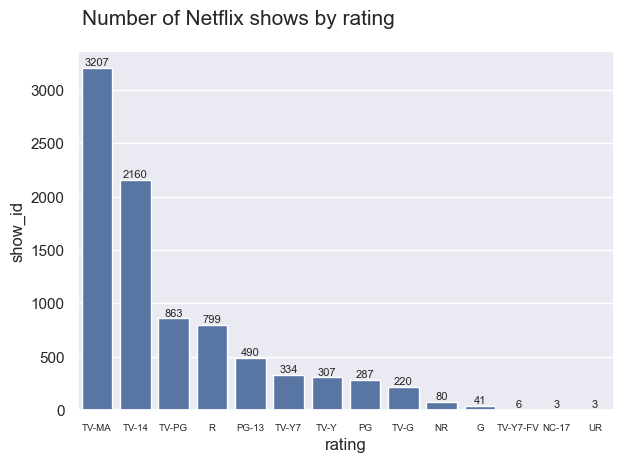

In [475]:
netflix_rating_clean_df = netflix_df.copy()
netflix_rating_clean_df = netflix_rating_clean_df[(~netflix_rating_clean_df['rating'].isin(['66 min','74 min','84 min']))
        &(~netflix_rating_clean_df['rating'].isna())]

rating_df = netflix_rating_clean_df[['rating','show_id']].groupby(['rating']).count()

rating_graph = sns.barplot(
    data = rating_df.sort_values(by=['show_id'],ascending=False),
    x = 'rating',
    y = 'show_id'
)


rating_graph.set_title('Number of Netflix shows by rating', x = 0.3, y = 1.05, fontsize = 15)
rating_graph.bar_label(rating_graph.containers[0],
                        fontsize = 8)

plt.xticks(fontsize = 7, rotation=0)
plt.tight_layout()

In [478]:
rating_def = {
    'PG-13': 'All ages with parental guidance',
    'TV-MA': 'Include age restriction',
    'PG': 'All ages with parental guidance',
    'TV-14': 'Include age restriction',
    'TV-PG': 'All ages',
    'TV-Y' : 'For young audience',
    'TV-Y7': 'For young audience',
    'TV-G': 'All ages',
    'TV-Y7-FV': 'For young audience',
    'NC-17': 'Include age restriction',
    'NR' :'Not rated',
    'UR' :'Not rated',
    'R': 'Include age restriction',
    'G': 'All ages'
}

netflix_rating_clean_df['rating_category'] = netflix_rating_clean_df['rating'].map(rating_def)

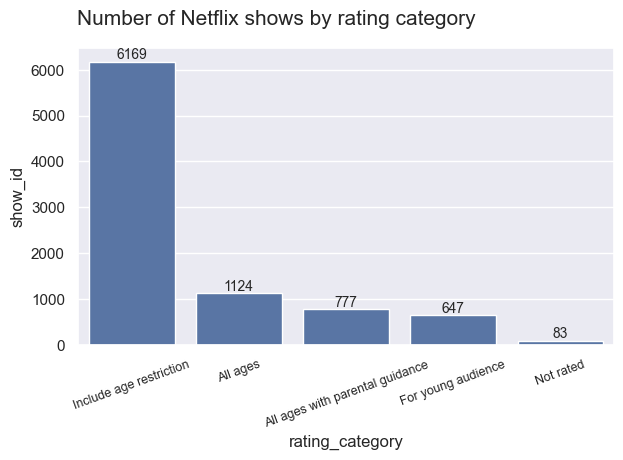

In [482]:
rating_category_df = netflix_rating_clean_df[['rating_category','show_id']].groupby(['rating_category']).count()

rating_category_graph = sns.barplot(
    data = rating_category_df.sort_values(by=['show_id'],ascending=False),
    x = 'rating_category',
    y = 'show_id'
)

rating_category_graph.set_title('Number of Netflix shows by rating category', x = 0.37, y = 1.05, fontsize = 15)

rating_category_graph.bar_label(rating_category_graph.containers[0],
                        fontsize = 10)

plt.xticks(fontsize = 9, rotation=20)
plt.tight_layout()

**Finding:**

Three out of four most popular ratings of Netflix shows are age restricted type (TV-MA, TV-14 and R). If we categorized the data as the 2nd graph,
<br> 
we can clearly see the dominance of that rating category.

(TV-MA: TV show or movie is intended for mature audiences, TV-14: a program contains content that may be unsuitable for children under the age of 
<br>
14, R rating: a movie contains adult material)